In [1]:
#Group Project 1: Crash Data from Montgomery County Maryland

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#Reading in the DataSets
crash_initial_data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv', low_memory=False)
crash_initial_data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [4]:
crash_initial_data.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

In [5]:
#Creating a dataframe with only the necessary columns, include
    #"Driver At Fault" column has data on the posted driver at fault
    #"Driver distracted By" has data on the posted driver distracted by
    #"Report Number" has the unique identifier for each crash

driver_distraction_data = pd.DataFrame({
    'Report Number': crash_initial_data['Report Number'],
    'Person ID': crash_initial_data['Person ID'],
    'Driver At Fault': crash_initial_data['Driver At Fault'],
    'Driver Distracted By': crash_initial_data['Driver Distracted By']
})
    
driver_distraction_data.head()

,Report Number,Person ID,Driver At Fault,Driver Distracted By
0,MCP3040003N,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,UNKNOWN
1,EJ78850038,E7058A8E-4F18-4D2A-954E-04A099CFED12,No,NOT DISTRACTED
2,MCP2009002G,2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925,Yes,NOT DISTRACTED
3,MCP3201004C,637D8107-0381-4B8D-848A-B4A93B4D53CE,Yes,LOOKED BUT DID NOT SEE
4,MCP23290028,52F904CB-822C-4D8D-9457-0D66B99AD407,Yes,NOT DISTRACTED


In [6]:
#Looking for missing data
driver_distraction_data.count()

Report Number           168157
Person ID               168157
Driver At Fault         168157
Driver Distracted By    168157
dtype: int64

In [7]:
# List unique values of "Report number"to locate any that may be the same
#Driver_total is number of unique distracted driver
unique_report_numbers = driver_distraction_data["Report Number"].unique()
driver_total = len(unique_report_numbers)
driver_total

94601

In [8]:
#looking for NaN for Road Name and Collision Type
unique_driver_at_fault = driver_distraction_data["Driver At Fault"].unique()
unique_driver_at_fault

array(['Yes', 'No', 'Unknown'], dtype=object)

In [9]:
#Listing the different type of collision
unique_driver_distracted_by = driver_distraction_data["Driver Distracted By"].unique()
unique_driver_distracted_by

array(['UNKNOWN', 'NOT DISTRACTED', 'LOOKED BUT DID NOT SEE',
       'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION',
       'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE',
       'NO DRIVER PRESENT', 'TEXTING FROM A CELLULAR PHONE',
       'EATING OR DRINKING',
       'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT',
       'OTHER CELLULAR PHONE RELATED', 'BY MOVING OBJECT IN VEHICLE',
       'TALKING OR LISTENING TO CELLULAR PHONE', 'BY OTHER OCCUPANTS',
       'ADJUSTING AUDIO AND OR CLIMATE CONTROLS',
       'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)',
       'USING DEVICE OBJECT BROUGHT INTO VEHICLE', 'SMOKING RELATED',
       'DIALING CELLULAR PHONE'], dtype=object)

In [10]:
#Creating a count column for the number of collision at each road collision
count_driver_distraction = driver_distraction_data.groupby("Driver At Fault")["Driver Distracted By"].count()
count_driver_distraction

Driver At Fault
No         73285
Unknown     4538
Yes        90334
Name: Driver Distracted By, dtype: int64

In [11]:
unique_driver_distracted_by

array(['UNKNOWN', 'NOT DISTRACTED', 'LOOKED BUT DID NOT SEE',
       'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION',
       'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE',
       'NO DRIVER PRESENT', 'TEXTING FROM A CELLULAR PHONE',
       'EATING OR DRINKING',
       'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT',
       'OTHER CELLULAR PHONE RELATED', 'BY MOVING OBJECT IN VEHICLE',
       'TALKING OR LISTENING TO CELLULAR PHONE', 'BY OTHER OCCUPANTS',
       'ADJUSTING AUDIO AND OR CLIMATE CONTROLS',
       'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)',
       'USING DEVICE OBJECT BROUGHT INTO VEHICLE', 'SMOKING RELATED',
       'DIALING CELLULAR PHONE'], dtype=object)

In [12]:
driver_distraction_data

,Report Number,Person ID,Driver At Fault,Driver Distracted By
0,MCP3040003N,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,UNKNOWN
1,EJ78850038,E7058A8E-4F18-4D2A-954E-04A099CFED12,No,NOT DISTRACTED
2,MCP2009002G,2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925,Yes,NOT DISTRACTED
3,MCP3201004C,637D8107-0381-4B8D-848A-B4A93B4D53CE,Yes,LOOKED BUT DID NOT SEE
4,MCP23290028,52F904CB-822C-4D8D-9457-0D66B99AD407,Yes,NOT DISTRACTED
...,...,...,...,...
168152,DM8338000C,BA80DDDE-3324-407D-9FB3-1836FCAAE2C6,No,NOT DISTRACTED
168153,MCP1182001S,7C147700-DF4B-4343-AA96-2056FFC1A588,Yes,LOOKED BUT DID NOT SEE
168154,MCP1453008X,470ABCF2-C6D3-4C23-B503-57BAEC974BDD,No,NOT DISTRACTED
168155,MCP2568000M,F8402B27-9E38-4602-B4FA-1CF604036EDD,No,NOT DISTRACTED


In [13]:
distraction_counts = driver_distraction_data['Driver Distracted By'].value_counts()

In [14]:
distraction_counts

Driver Distracted By
NOT DISTRACTED                                       104426
UNKNOWN                                               31929
LOOKED BUT DID NOT SEE                                20979
INATTENTIVE OR LOST IN THOUGHT                         4219
OTHER DISTRACTION                                      3180
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT            948
BY OTHER OCCUPANTS                                      413
OTHER CELLULAR PHONE RELATED                            365
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)       321
TALKING OR LISTENING TO CELLULAR PHONE                  278
NO DRIVER PRESENT                                       274
BY MOVING OBJECT IN VEHICLE                             206
EATING OR DRINKING                                      195
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                 133
USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE          92
TEXTING FROM A CELLULAR PHONE                            65
USING DEVICE OBJECT

In [15]:
distracted_by_df = pd.DataFrame({
    'Texting A Cellular Phone': [distraction_counts.get('TEXTING FROM A CELLULAR PHONE', 0)/driver_distraction_data.shape[0]*100],
    'Eating Or Drinking': [distraction_counts.get('EATING OR DRINKING', 0)/driver_distraction_data.shape[0]*100],
    'Smoking Related': [distraction_counts.get('SMOKING RELATED', 0)/driver_distraction_data.shape[0]*100],
    'By Moving Object In Vehicle': [distraction_counts.get('BY MOVING OBJECT IN VEHICLE', 0)/driver_distraction_data.shape[0]*100],
    'Other Distraction': [distraction_counts.get('OTHER DISTRACTION', 0)/driver_distraction_data.shape[0]*100],
    'Not Distracted': [distraction_counts.get('NOT DISTRACTED', 0)/driver_distraction_data.shape[0]*100],
    'Unknown': [distraction_counts.get('UNKNOWN', 0)/driver_distraction_data.shape[0]*100],
    'Looked But Did Not See': [distraction_counts.get('LOOKED BUT DID NOT SEE', 0)/driver_distraction_data.shape[0]*100],
    'Inattentive Or Lost In Thought': [distraction_counts.get('INATTENTIVE OR LOST IN THOUGHT', 0)/driver_distraction_data.shape[0]*100],
    'Distracted By Outside Person Object Or Event': [distraction_counts.get('DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT', 0)/driver_distraction_data.shape[0]*100],
    'By Other Occupants': [distraction_counts.get('BY OTHER OCCUPANTS', 0)/driver_distraction_data.shape[0]*100],
    'Other Cellular Phone Related': [distraction_counts.get('OTHER CELLULAR PHONE RELATED', 0)/driver_distraction_data.shape[0]*100],
    'Other Electronic Device': [distraction_counts.get('OTHER ELECTRONIC DEVICE', 0)/driver_distraction_data.shape[0]*100],
    'Talking Or Listening To Cellular Phone': [distraction_counts.get('TALKING OR LISTENING TO CELLULAR PHONE', 0)/driver_distraction_data.shape[0]*100],
    'No Driver Present': [distraction_counts.get('NO DRIVER PRESENT', 0)/driver_distraction_data.shape[0]*100],
    'Adjusting And Or Climate Controls': [distraction_counts.get('ADJUSTING AUDIO AND OR CLIMATE CONTROLS', 0)/driver_distraction_data.shape[0]*100],
    'Using Other Device Controls Integral To Vehicle': [distraction_counts.get('USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE', 0)/driver_distraction_data.shape[0]*100],
    'Using Device Object Brought Into Vehicle': [distraction_counts.get('USING DEVICE OBJECT BROUGHT INTO VEHICLE', 0)/driver_distraction_data.shape[0]*100],
    'Dialing Cellular Phone': [distraction_counts.get('DIALING CELLULAR PHONE', 0)/driver_distraction_data.shape[0]*100]
})


In [16]:
distracted_by_df

,Texting A Cellular Phone,Eating Or Drinking,Smoking Related,By Moving Object In Vehicle,Other Distraction,Not Distracted,Unknown,Looked But Did Not See,Inattentive Or Lost In Thought,Distracted By Outside Person Object Or Event,By Other Occupants,Other Cellular Phone Related,Other Electronic Device,Talking Or Listening To Cellular Phone,No Driver Present,Adjusting And Or Climate Controls,Using Other Device Controls Integral To Vehicle,Using Device Object Brought Into Vehicle,Dialing Cellular Phone
0,0.038654,0.115963,0.015462,0.122505,1.89109,62.100299,18.987613,12.475841,2.508965,0.563759,0.245604,0.217059,0.0,0.165322,0.162943,0.079093,0.054711,0.036276,0.02795


In [17]:
driver_distraction_data.shape[0]

168157

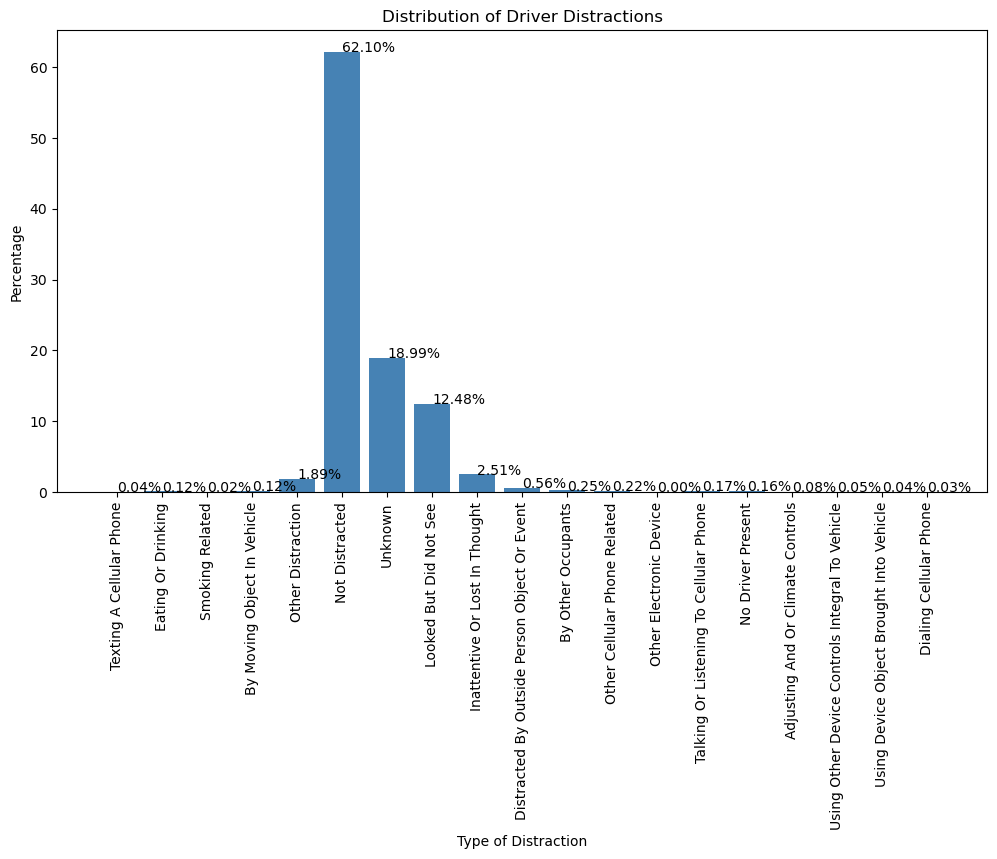

In [20]:
# Extracting data for the pie chart from the first row
bar_data = distracted_by_df.iloc[0]

# Labels for the pie chart are the column names of the DataFrame
labels = distracted_by_df.columns

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, bar_data, color='steelblue')

# Adding labels and title
plt.xlabel('Type of Distraction')
plt.ylabel('Percentage')
plt.title('Distribution of Driver Distractions')
plt.xticks(rotation="vertical")

# Adding value labels on top of each bar
for index, value in enumerate(bar_data):
    plt.text(index, value, f'{value:.2f}%')

# Show the plot
plt.show()